0.328 41/125


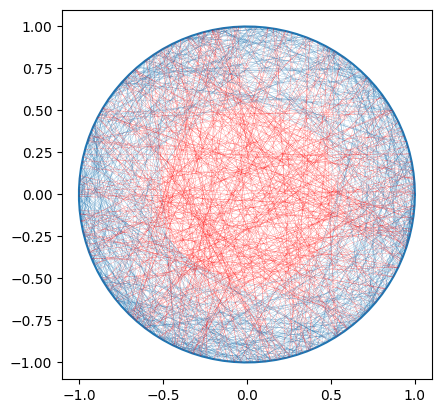

In [54]:
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.lines as l
from fractions import Fraction

N=1000

def random_point():
    theta = np.random.uniform(0, 2 * np.pi)
    return np.cos(theta), np.sin(theta)

def check_validity_s1(x1, y1, x2, y2):
    # for radius 1, with trigonometric proprieties in right triangle => length of side of equilateral triangle is 3^(1/2)
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) > np.sqrt(3)

def simulation_1():
    # create circle
    # choose angles between [0, 2*pi]
    angle = np.linspace(0 , 2 * np.pi , 100)
    radius = 1
    # translate from polar to cartesian
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    # one subplot
    figure, axes = mpl.subplots(1)
    # plot points
    axes.plot(x, y)
    axes.set_aspect(1)

    larger = 0
    for i in range(N):
        x1, y1 = random_point()
        x2, y2 = random_point()
        line = l.Line2D([x1, x2], [y1, y2], linewidth=0.1)

        if check_validity_s1(x1, y1, x2, y2):
            larger += 1
            line.set_color("red")

        axes.add_line(line)

    print(larger/N, Fraction(larger, N))

simulation_1()

0.24 6/25


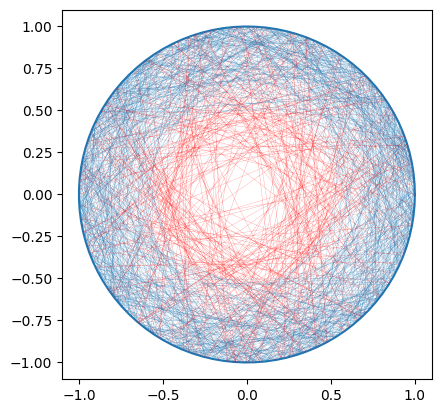

In [55]:
import sympy as sym
N=1000

def random_single_point():
    # find a point within the circle
    r = np.sqrt(np.random.uniform(0, 1))
    theta = np.random.uniform(0, 2 * np.pi)
    return r * np.cos(theta), r * np.sin(theta)


def check_validity_s2(x, y):
    # the random chosen point needs to pe in the circle with radius 1/2 fro the chord to be larger
    return x ** 2 + y ** 2 < 1/4

def simulation_2():
    # create circle
    angle = np.linspace(0 , 2 * np.pi , 100)
    radius = 1
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    figure, axes = mpl.subplots(1)
    axes.plot(x, y)
    axes.set_aspect(1)

    larger = 0
    for i in range(N):
        x_point, y_point = random_single_point()

        # for any chord, the segment between the middle point and circle center is perpendicular on the chord
        # steps:
        # find equation of line middle point and circle center
        # find slope of chord from slope of previous
        # find equation of chord
        # we find the intersection for the circle and the equation of chord in two points
        x1, x2, y1, y2 = sym.symbols('x1, x2, y1, y2')
        eq1 = sym.Eq(y1 - y_point + (x_point/y_point) * (x1 - x_point), 0)
        eq2 = sym.Eq(y2 - y_point + (x_point/y_point) * (x2 - x_point), 0)
        eq3 = sym.Eq(x1 ** 2 + y1 ** 2, 1)
        eq4 = sym.Eq(x2 ** 2 + y2 ** 2, 1)

        result = sym.solve([eq1, eq2, eq3, eq4], (x1, x2, y1, y2))
        for res in result:
            # we find 4 points in which the system holds: we need to choose the result in which the points of the chord are not the same
            if res[0] != res[1]:
                line = l.Line2D([res[0], res[1]], [res[2], res[3]], linewidth=0.1)

                if check_validity_s2(x_point, y_point):
                    larger += 1
                    line.set_color("red")

                axes.add_line(line)
                break

    print(larger/N, Fraction(larger, N))

simulation_2()

0.501 501/1000


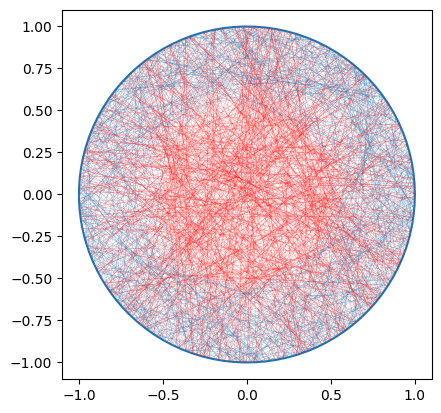

In [53]:
N=1000

def random_point_on_radius(x_point_on_circle, y_point_on_circle):
    u = np.random.uniform(0, 1)
    x = x_point_on_circle * u
    y = y_point_on_circle * u
    return x, y

def check_validity_s3(x, y):
    # the length from the random point from the segment to centre needs to pe smaller than 1/2 (found from right triangle proprieties)
    return np.sqrt(x ** 2 + y ** 2) < 1/2

def simulation_3():
    # create circle
    angle = np.linspace(0 , 2 * np.pi , 100)
    radius = 1
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    figure, axes = mpl.subplots(1)
    axes.plot(x, y)
    axes.set_aspect(1)

    larger = 0
    for i in range(N):
        # choose a point of the circle then choose a random point in the segment from the point to the center
        x_point_on_circle, y_point_on_circle = random_point()
        x_random_point_on_segment, y_random_point_on_segment = random_point_on_radius(x_point_on_circle, y_point_on_circle)

        x1, x2, y1, y2 = sym.symbols('x1, x2, y1, y2')
        eq1 = sym.Eq(y1 - y_random_point_on_segment + (x_random_point_on_segment/y_random_point_on_segment) * (x1 - x_random_point_on_segment), 0)
        eq2 = sym.Eq(y2 - y_random_point_on_segment + (x_random_point_on_segment/y_random_point_on_segment) * (x2 - x_random_point_on_segment), 0)
        eq3 = sym.Eq(x1 ** 2 + y1 ** 2, 1)
        eq4 = sym.Eq(x2 ** 2 + y2 ** 2, 1)

        result = sym.solve([eq1, eq2, eq3, eq4], (x1, x2, y1, y2))
        for res in result:
            if res[0] != res[1]:
                line = l.Line2D([res[0], res[1]], [res[2], res[3]], linewidth=0.1)

                if check_validity_s3(x_random_point_on_segment, y_random_point_on_segment):
                    larger += 1
                    line.set_color("red")

                axes.add_line(line)
                break
    print(larger/N, Fraction(larger, N))

simulation_3()
